In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
import astropy.coordinates as coord

In [19]:
# Load in the data from the Gaia DR3 data reduction 
path = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/GaiaDR3_data_reduced_feh.hdf5'
with h5py.File(path, 'r') as f:
    x_gal = f['x_gal'][:]
    y_gal = f['y_gal'][:]
    z_gal = f['z_gal'][:]
    vx_gal = f['vx_gal'][:]
    vy_gal = f['vy_gal'][:]
    vz_gal = f['vz_gal'][:]
    feh = f['feh'][:]
    source_id = f['source_id'][:] 

# Keep a copy of the source_id
keep_source_id = source_id

In [ ]:
# First cut: keep stars with |z| > 1.5 kpc
z_mask = (np.absolute(z_gal) > 1.5)
source_id_z = source_id[z_mask]
vx_z = vx_gal[z_mask]
vy_z = vy_gal[z_mask]
vz_z = vz_gal[z_mask]
feh_z = feh[z_mask]

In [ ]:
# Second cut: keep stars with [Fe/H] < -1.5
fe_mask = (feh_z < -1.5)
source_id_z_fe = source_id_z[fe_mask]
vx_z_fe = vx_z[fe_mask]
vy_z_fe = vy_z[fe_mask]
vz_z_fe = vz_z[fe_mask]
feh_z_fe = feh_z[fe_mask]

In [ ]:
# Add this column of is_accreted labels to the dataset
accretion_id = np.isin(keep_source_id, source_id_z_fe)
accretion = np.int32(accretion_id)
is_accreted = accretion
with h5py.File(path, 'a') as f:
    # del f['is_accreted']
    f.create_dataset('is_accreted', data=accretion)

In [2]:
# Reloading data from the Gaia DR3 data reduction
path = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/GaiaDR3_data_reduced_feh.hdf5'
with h5py.File(path, 'r') as f:
    print(list(f.keys()))
    ra = f['ra'][:]
    vx = f['vx_gal'][:]
    vy = f['vy_gal'][:]
    vz = f['vz_gal'][:]
    z = f['z_gal'][:]
    is_accreted = f['is_accreted'][:]
    feh = f['feh'][:]

# Assign labels based on the cuts above
vx0 = vx[is_accreted == 0]
vx1 = vx[is_accreted == 1]
vy0 = vy[is_accreted == 0]
vy1 = vy[is_accreted == 1]
vz0 = vz[is_accreted == 0]
vz1 = vz[is_accreted == 1]
vr0 = np.sqrt(vx0**2 + vz0**2)
vr1 = np.sqrt(vx1**2 + vz1**2)
z0 = z[is_accreted == 0]
z1 = z[is_accreted == 1]
feh0 = feh[is_accreted == 0]
feh1 = feh[is_accreted == 1]


['Jphi', 'Jr', 'Jz', 'dec', 'feh', 'is_accreted', 'parallax', 'parallax_over_error', 'phi_cyl', 'pmdec', 'pmra', 'ra', 'radial_velocity', 'rho_cyl', 'source_id', 'vphi_cyl', 'vrho_cyl', 'vx_gal', 'vy_gal', 'vz_cyl', 'vz_gal', 'x_gal', 'y_gal', 'z_cyl', 'z_gal']


In [3]:
# Remove NaNs from the dataset
non_nan_mask_0 = ~np.isnan(vr0)
vr0 = vr0[non_nan_mask_0]
vx0 = vx0[non_nan_mask_0]
vy0 = vy0[non_nan_mask_0]
vz0 = vz0[non_nan_mask_0]
feh0 = feh0[non_nan_mask_0]
z0 = z0[non_nan_mask_0]

non_nan_mask_1 = ~np.isnan(vr1)
vr1 = vr1[non_nan_mask_1]
vx1 = vx1[non_nan_mask_1]
vy1 = vy1[non_nan_mask_1]
vz1 = vz1[non_nan_mask_1]
feh1 = feh1[non_nan_mask_1]
z1 = z1[non_nan_mask_1]

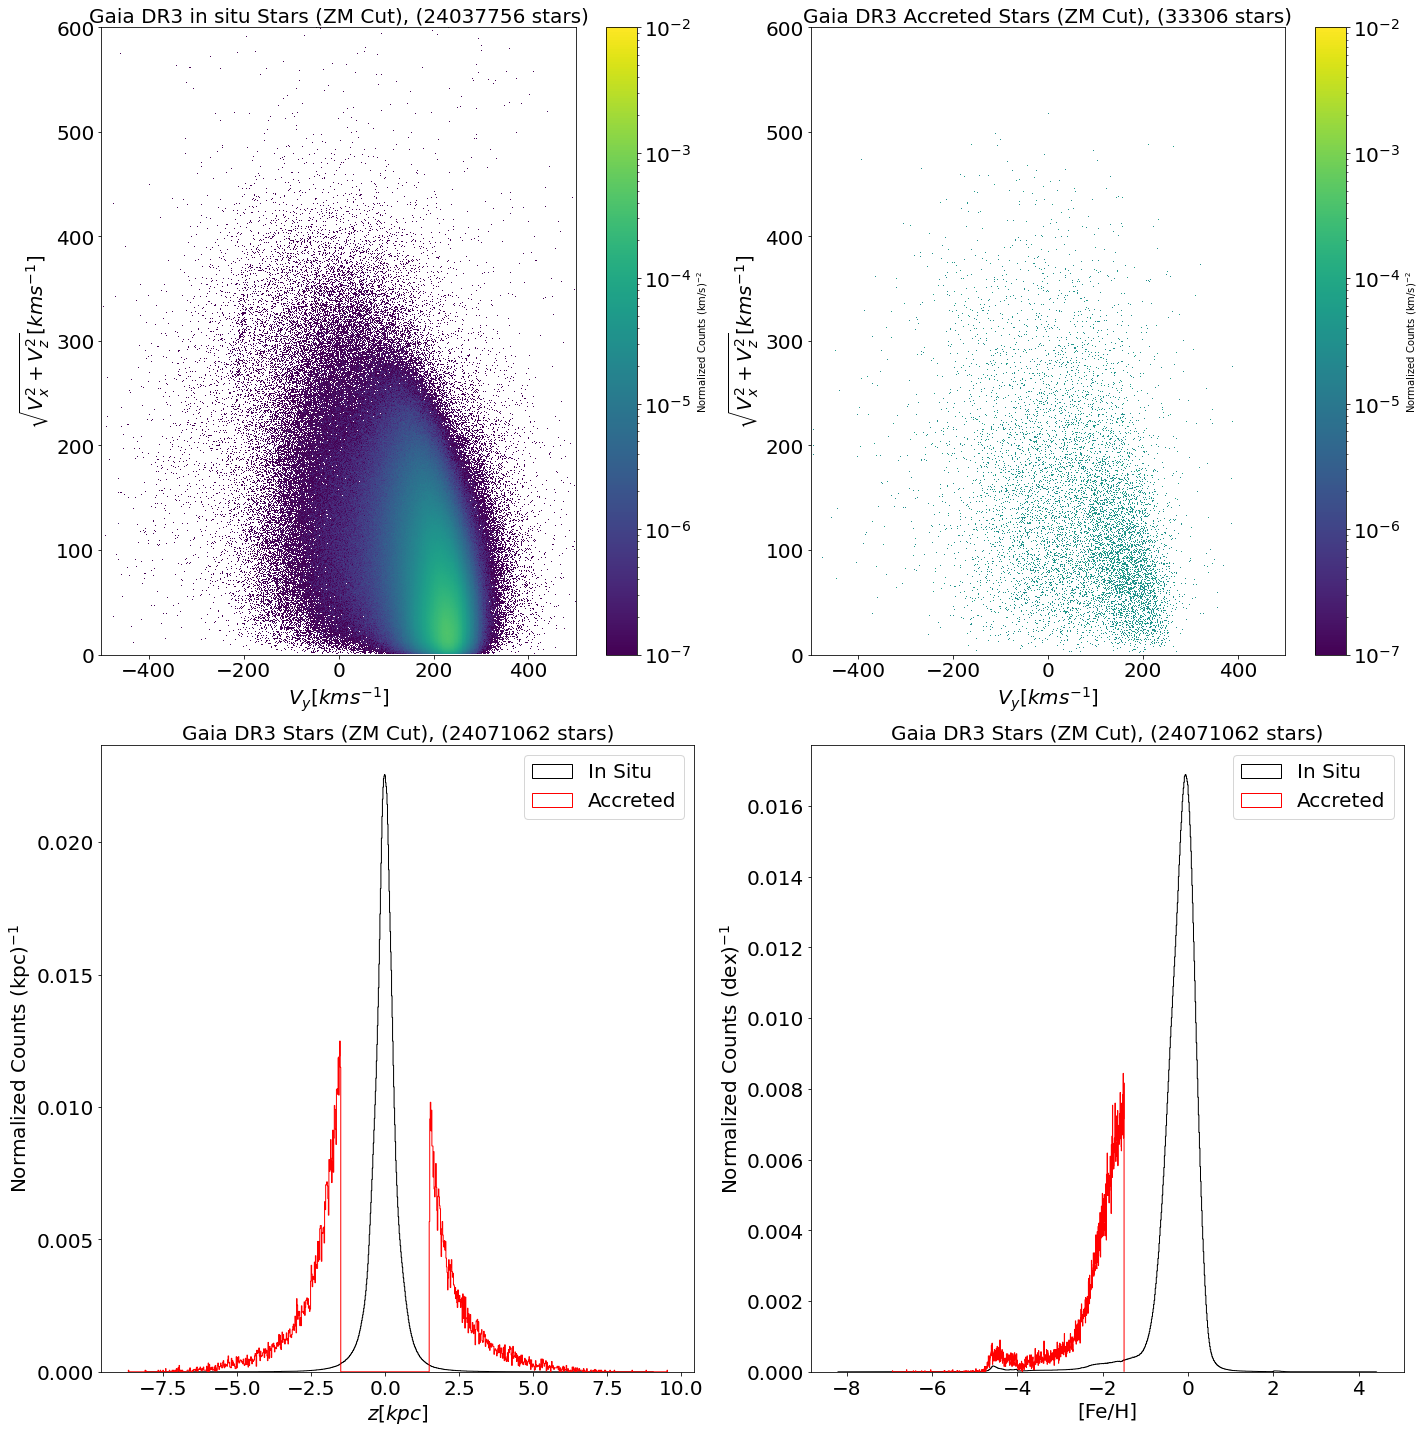

In [15]:
# Plot the Toomre diagrams for accreted and in situ stars based on ZM cuts
# Plot z and feh distributions for accreted and in situ stars based on ZM cuts
fig, ax = plt.subplots(2,2, figsize=(20, 20))

h = ax[0,0].hist2d(vy0, vr0, bins=500, weights=np.repeat(1/len(vx0), len(vx0)), norm=mpl.colors.LogNorm(vmin=10e-8, vmax=10e-3))
ax[0,0].set_xlabel(r'$V_y [km s^{-1}]$', fontsize=20)
ax[0,0].set_ylabel(r'$\sqrt{V_x^2+V_z^2} [km s^{-1}]$', fontsize=20)
ax[0,0].set_title(f'Gaia DR3 in situ Stars (ZM Cut), ({len(vy0)} stars)', fontsize=20)
ax[0,0].set_xlim([-500, 500])
ax[0,0].set_ylim([0, 600])
cb = fig.colorbar(h[3], ax=ax[0,0], label=r'Normalized Counts (km/s)$^{-2}$') 
cb.ax.tick_params(labelsize=20)
ax[0,0].tick_params(axis='both', labelsize=20)


h = ax[0,1].hist2d(vy1, vr1, bins=500, weights=np.repeat(1/len(vx1), len(vx1)), norm=mpl.colors.LogNorm(vmin=10e-8, vmax=10e-3))
ax[0,1].set_xlabel(r'$V_y [km s^{-1}]$', fontsize=20)
ax[0,1].set_ylabel(r'$\sqrt{V_x^2+V_z^2} [km s^{-1}]$', fontsize=20)
ax[0,1].set_title(f'Gaia DR3 Accreted Stars (ZM Cut), ({len(vy1)} stars)', fontsize=20)
ax[0,1].set_xlim([-500, 500])
ax[0,1].set_ylim([0, 600])
cb = fig.colorbar(h[3], ax=ax[0,1], label=r'Normalized Counts (km/s)$^{-2}$') 
cb.ax.tick_params(labelsize=20)
ax[0,1].tick_params(axis='both', labelsize=20)

ax[1,0].hist(z0, bins=500, weights=np.repeat(1/len(z0), len(z0)), histtype='step', color='k', label='In Situ')
ax[1,0].hist(z1, bins=500, weights=np.repeat(1/len(z1), len(z1)), histtype='step', color='r', label='Accreted')
ax[1,0].set_xlabel(r'$z [kpc]$', fontsize=20)
ax[1,0].set_ylabel(r'Normalized Counts (kpc)$^{-1}$', fontsize=20)
ax[1,0].set_title(f'Gaia DR3 Stars (ZM Cut), ({len(z0)+len(z1)} stars)', fontsize=20)
# ax[1,0].set_xlim([-10, 10])
# ax[1,0].set_ylim([0, 0.5])
ax[1,0].tick_params(axis='both', labelsize=20)
ax[1,0].legend(fontsize=20)

ax[1,1].hist(feh0, bins=500, weights=np.repeat(1/len(feh0), len(feh0)), histtype='step', color='k', label='In Situ')
ax[1,1].hist(feh1, bins=500, weights=np.repeat(1/len(feh1), len(feh1)), histtype='step', color='r', label='Accreted')
ax[1,1].set_xlabel(r'[Fe/H]', fontsize=20)
ax[1,1].set_ylabel(r'Normalized Counts (dex)$^{-1}$', fontsize=20)
ax[1,1].set_title(f'Gaia DR3 Stars (ZM Cut), ({len(feh0)+len(feh1)} stars)', fontsize=20)
# ax[1,1].set_xlim([-3, 1])
# ax[1,1].set_ylim([0, 0.5])
ax[1,1].tick_params(axis='both', labelsize=20)
ax[1,1].legend(fontsize=20)

plt.tight_layout()
plt.legend(fontsize=20)
plt.show()

In [14]:
# Calculate the fraction of accreted stars in the ZM cut
len(vy1) / len(ra)

0.00036936026106338006

In [4]:
# Check if any star is out of the ZM cut
np.sum(~(np.absolute(z1)>1.5)), np.sum(~(feh1<-1.5))

(0, 0)

In [14]:
# Check if any feh is out of the ZM cut
feh_test_z = feh0[np.absolute(z0)>1.5]
feh_test__feh = feh_test_z[feh_test_z<-1.5]
feh_test_z.shape, feh_test__feh.shape

((430135,), (0,))